# Predicting GitHub Repo Languanges

Overview:

In this project, README's from GitHub repositories are analyzed and modelled using natural language processing techniques. The repositories contain primarily "Python", "Javascript", or "Other" files. Repo names are scraped from the most popular repositories on GitHub. The README contents are then acquired using GitHub's API. After the data is acquired, the README contents are cleaned and prepared so they can be analyzed. Analysis and stats test will be done to compare things such as length and unique words. NLP techniques and classification models will be used to predict which language is primarily used in the GitHub repos.


Project goals:

- analyze GitHub repository README's and how they compare whether the repository primarily consists of Python, Javascript, or other programming languages.
- predict whether a GitHub Repository primarily consists of Python files, Javascript files, or other files.

In [1]:
# Import libraires

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Import py files for functions
import prepare as p
import explore as e
import model as m

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Acquire

1. GitHub repository names are scraped from GitHub's most [forked](https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories) and [starred](https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories) repositories. 
2. After the list of repo names are scraped, the names are run through GitHub's API to get the README contents along with the primary language of the repo.
3. The data is then saved into a [json file]('data2.json').

In [2]:
# Read in JSON file 
df = pd.read_json('data2.json')
df.head(5)

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
4,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...


### Prepare
1. README's are cleaned:
    1. characters are lowered
    1. removed punctuation, numbers, extra whitespaces, long words, accented/special characters, and stopwords
    1. text is tokenized (broken down into smaller units)
    1. stemmed and lemmatized versions of the README's are saved
2. Languages are categorized into `Python` (1), `Javascript` (2), and `Other` (0)

In [3]:
# Prepare the DataFrame
df = p.prepare_data(df)
df.head(3)

,repo,language,readme_contents,clean_text,stem,lemmatize,target
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...,share data statistician guid anyon need share ...,share data statistician guide anyone need shar...,0
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...,well hello repository meant provide example fo...,0
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...,welcome smartthings public github repo repo co...,welcom smartth public github repo repo contain...,welcome smartthings public github repo repo co...,0


## Exploration

Split data and explore training set

In [4]:
# Splitting data
train, validate, test = p.split_data(df)

**What are the most common words throughout all README's?**

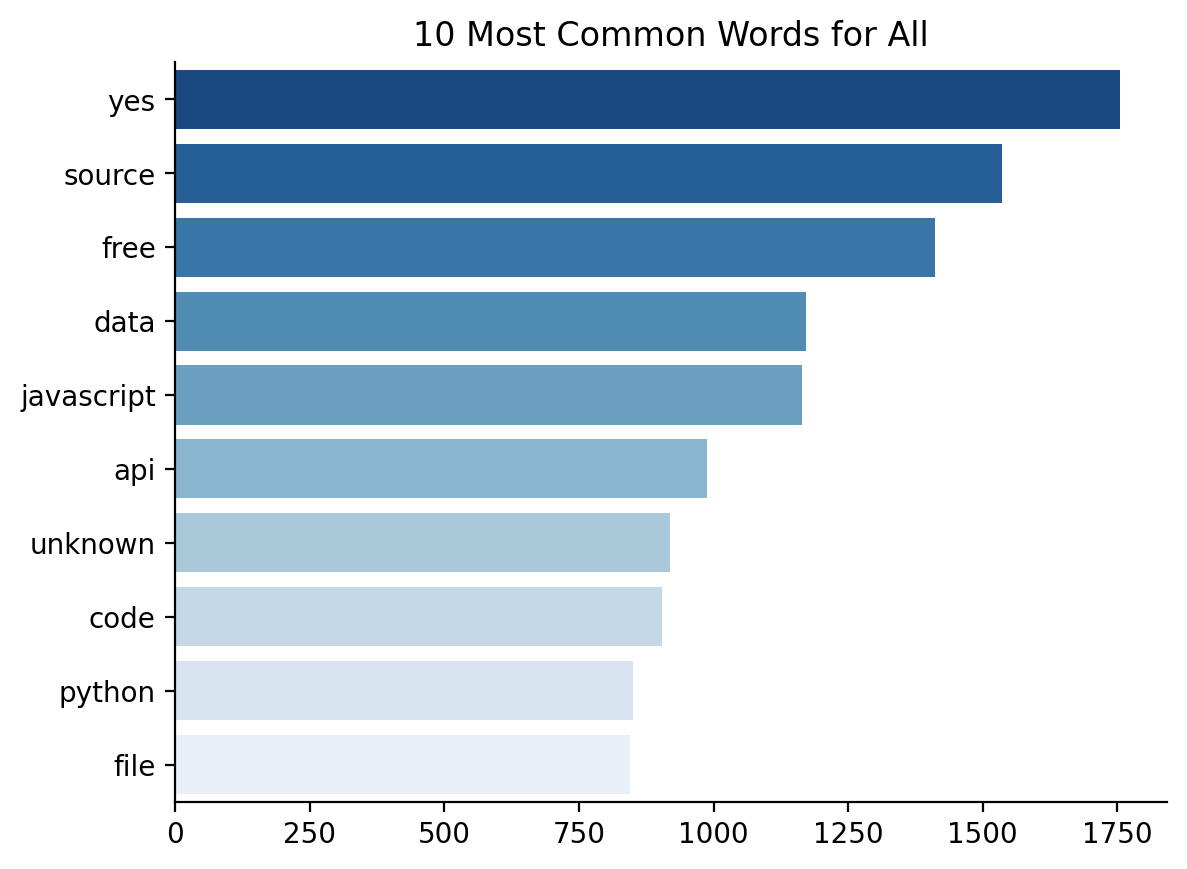

In [5]:
# Finding the most commmon words
e.find_most_common_words(train, num_words=10);

**Does the length of the README vary by programming language?**

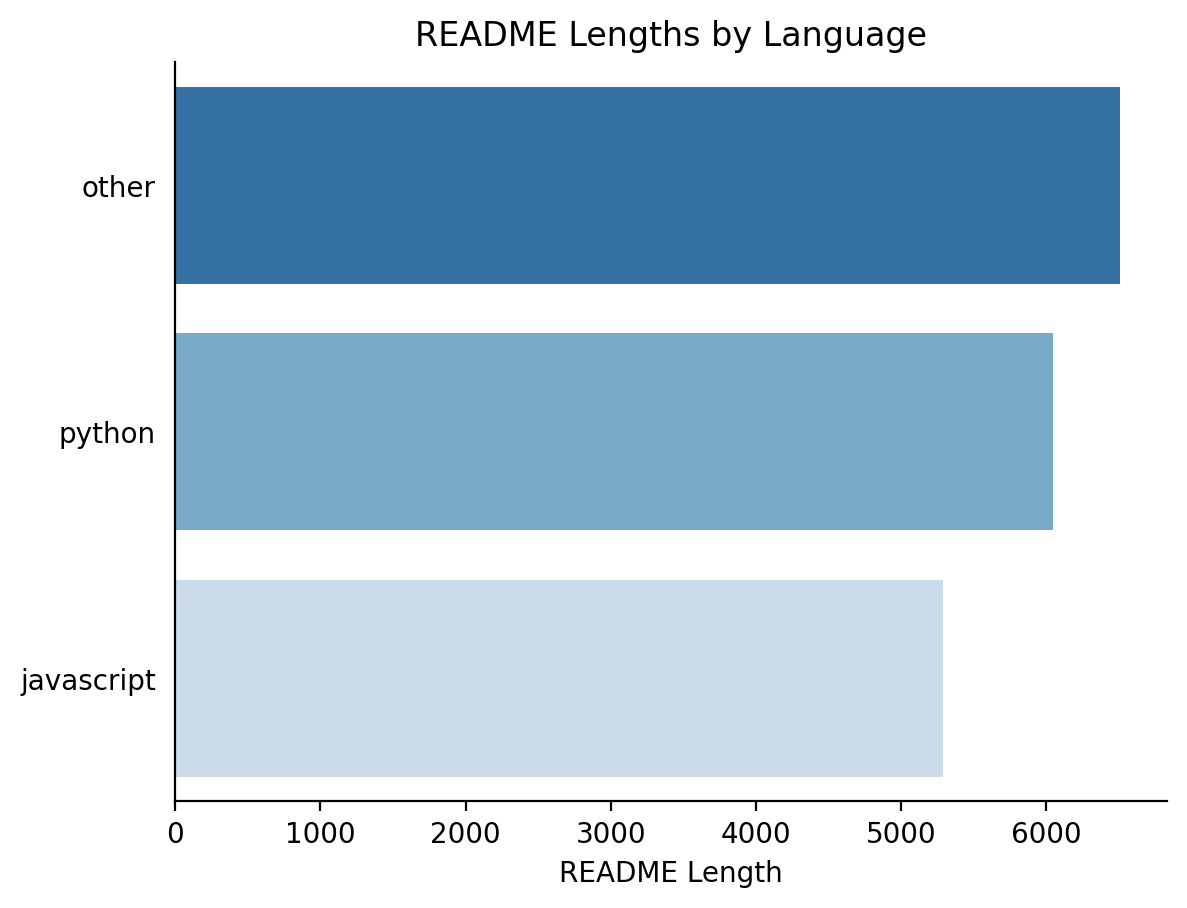

In [6]:
# Lenght of the Readme by programming language
e.plot_readme_lengths(train)

ANOVA Test to test whether there is a statistically significant difference in the average README length for each programming language.

In [7]:
# Running anova Test for readme length
e.run_anova_test_for_readme_length(train)

p_value 0.876240244297908
There are no significant differences in the average README length among different programming languages.


**Do different programming languages use a different number of unique words?**

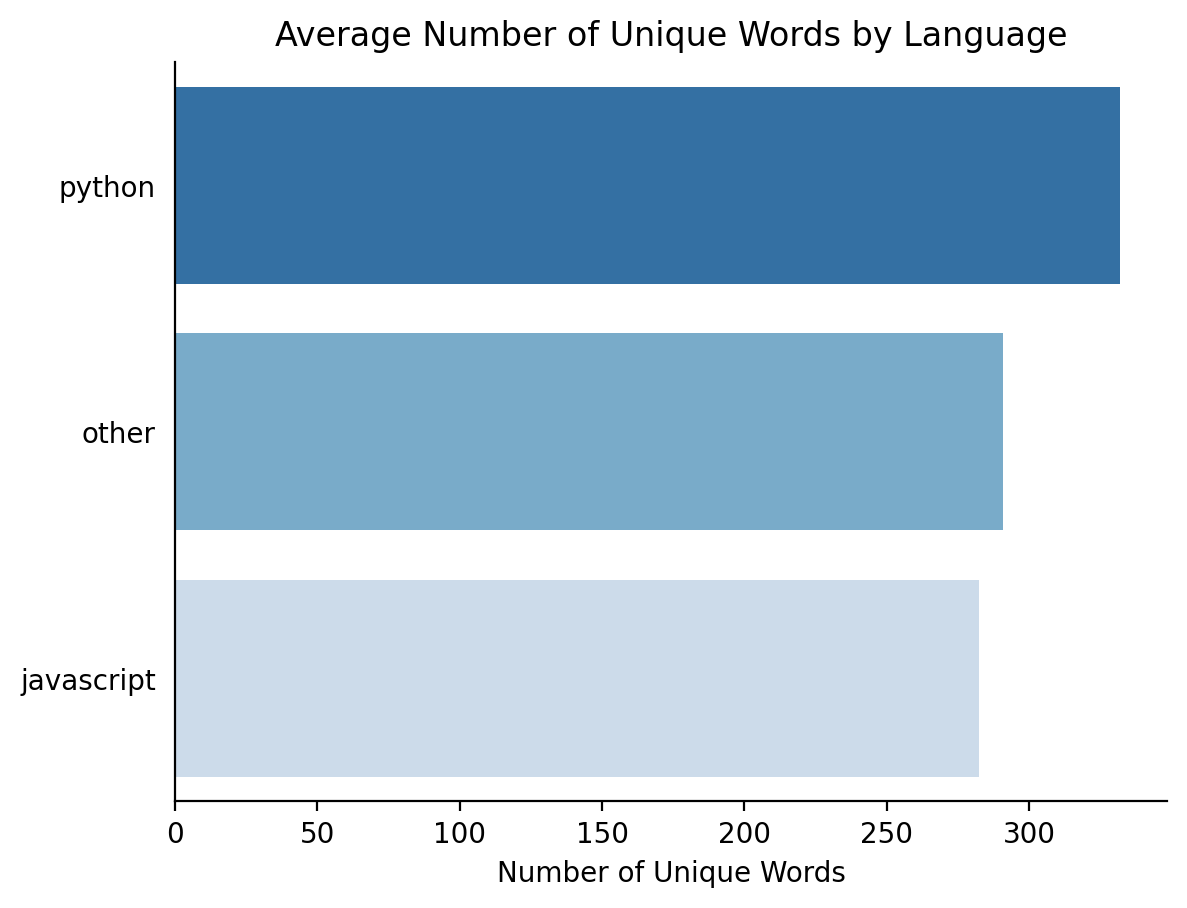

In [8]:
# Number of unique words
e.plot_unique_word_averages(train)

ANOVA Test to test whether there is a statistically significant difference in the average number of unique words for each programming language.

In [9]:
# Anova test for unique words
e.run_anova_test_for_number_of_unique_words(train)

p_value 0.9247789267027375
There are no significant differences in the mean number of unique words among different programming languages.


**Are there any words that uniquely identify a programming language?**

Other:
img           0.029869
code          0.027694
project       0.022915
javascript    0.022079
learning      0.021969
Name: 0.0, dtype: float64 



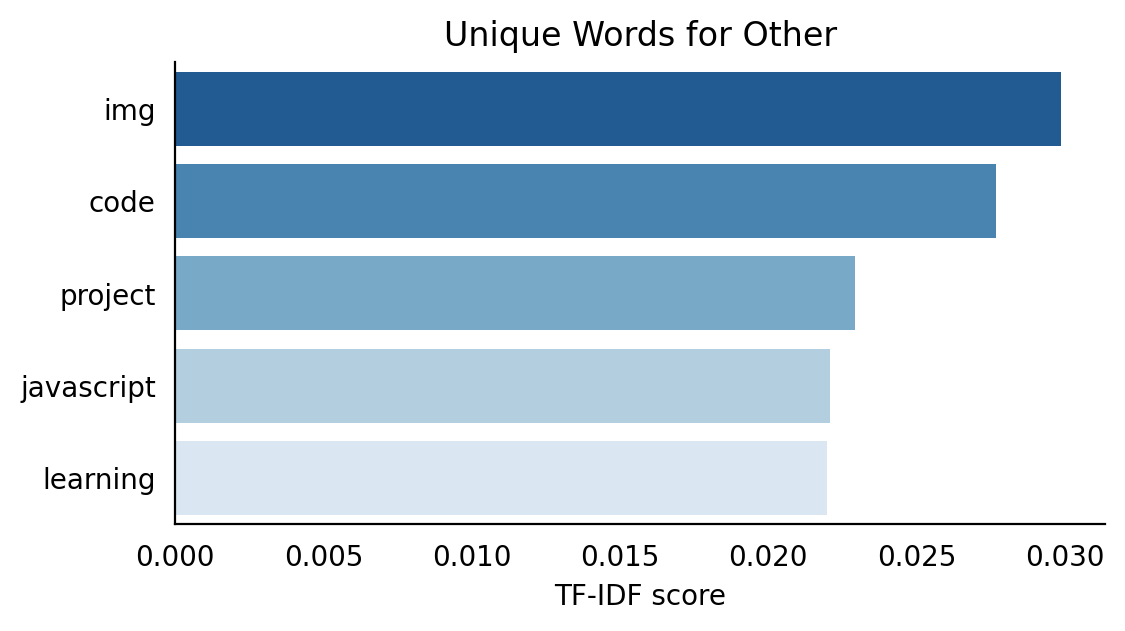

--------------------------------------------------
Python:
data       0.047977
img        0.040956
spring     0.040936
tidb       0.037057
request    0.036126
Name: 1.0, dtype: float64 



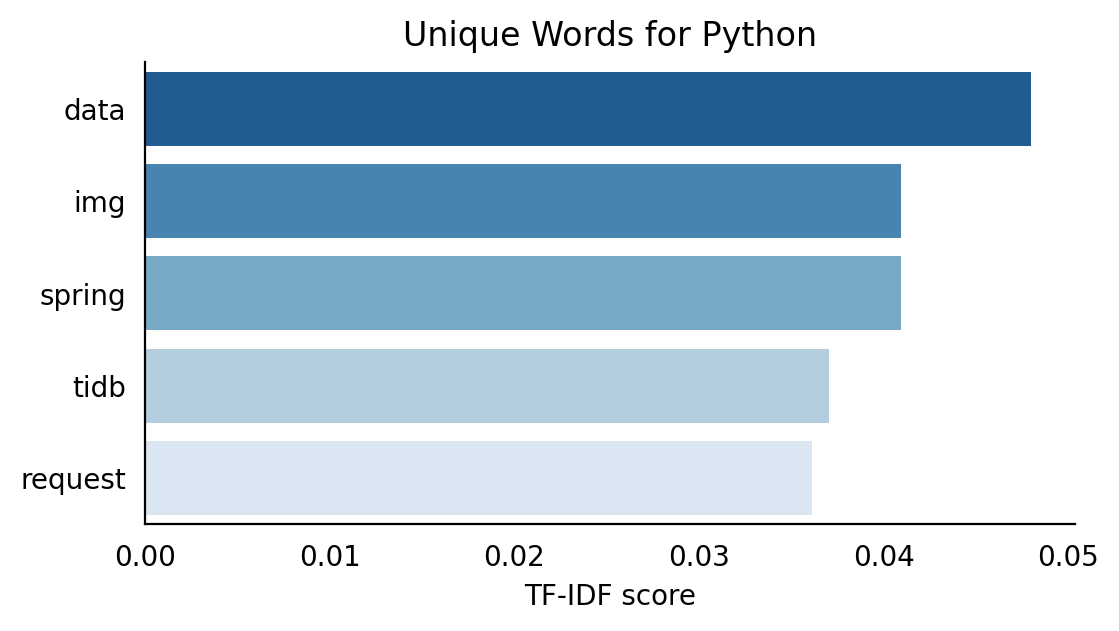

--------------------------------------------------
Javascript:
spring      0.068884
img         0.036787
security    0.034609
file        0.029935
widthpx     0.028684
Name: 2.0, dtype: float64 



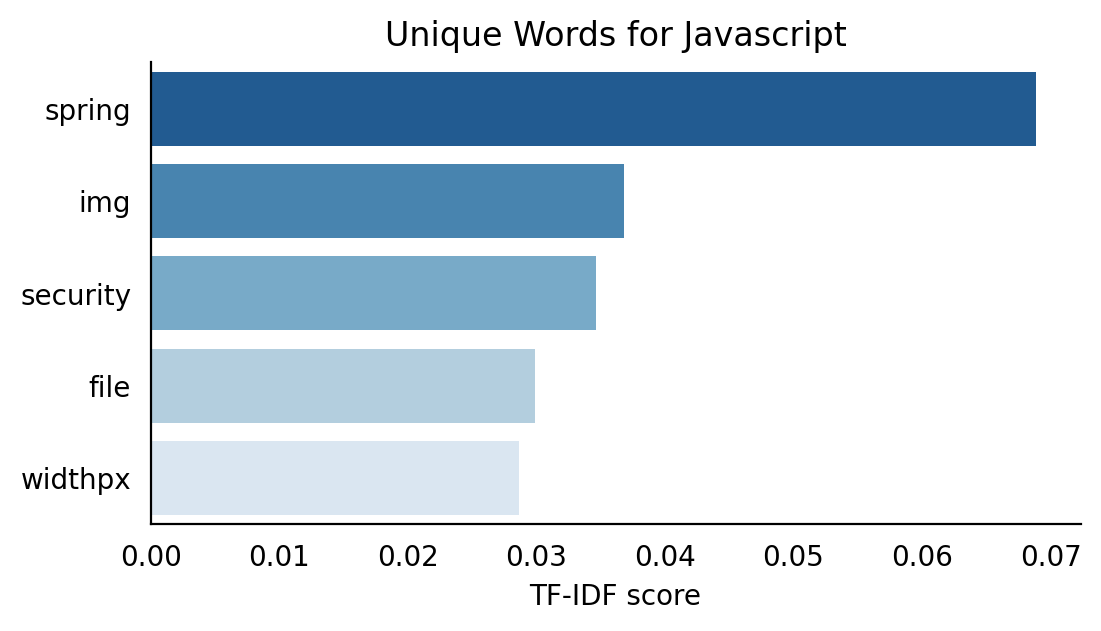

In [10]:
# Indentifying words for program language
e.identify_unique_words(train, plot=True)

## Modeling

**Baseline Model**

In [11]:
# Running baseline
m.run_baseline_model()

Train
Accuracy: 71.13%
---
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       170
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        38

    accuracy                           0.71       239
   macro avg       0.24      0.33      0.28       239
weighted avg       0.51      0.71      0.59       239

---
Validate
Accuracy: 74.19%
---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        23
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4

    accuracy                           0.74        31
   macro avg       0.25      0.33      0.28        31
weighted avg       0.55      0.74      0.63        31

---


**Logistic Regression**

***Performance***: Slightly Outperforms Baseline

In [12]:
# Logistic Model
m.run_logistic_model()

Train
Accuracy: 72.80%
---
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       170
           1       1.00      0.10      0.18        31
           2       1.00      0.03      0.05        38

    accuracy                           0.73       239
   macro avg       0.91      0.37      0.36       239
weighted avg       0.80      0.73      0.63       239

---
Validate
Accuracy: 77.42%
---
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         4

    accuracy                           0.77        31
   macro avg       0.59      0.42      0.42        31
weighted avg       0.70      0.77      0.70        31

---


**Decision Tree**

***Performance***: Overfits on Training Set

In [13]:
# Decision Tree Model
m.run_decisiontree_model()

Train
Accuracy: 83.68%
---
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       170
           1       0.90      0.58      0.71        31
           2       0.84      0.42      0.56        38

    accuracy                           0.84       239
   macro avg       0.86      0.66      0.72       239
weighted avg       0.84      0.84      0.82       239

---
Validate
Accuracy: 64.52%
---
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.33      0.25      0.29         4
           2       0.20      0.25      0.22         4

    accuracy                           0.65        31
   macro avg       0.44      0.43      0.43        31
weighted avg       0.65      0.65      0.65        31

---


**Random Forests**

***Performance***: Makes Baseline Predictions

In [14]:
# Random Forest Model
m.run_randomforest_model()

Train
Accuracy: 71.13%
---
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       170
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        38

    accuracy                           0.71       239
   macro avg       0.24      0.33      0.28       239
weighted avg       0.51      0.71      0.59       239

---
Validate
Accuracy: 74.19%
---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        23
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4

    accuracy                           0.74        31
   macro avg       0.25      0.33      0.28        31
weighted avg       0.55      0.74      0.63        31

---


**Naive Bayes**

***Performance***: Makes Baseline Predictions

In [15]:
# Naive Bayes Model
m.run_naivebayes_model()

Train
Accuracy: 71.13%
---
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       170
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        38

    accuracy                           0.71       239
   macro avg       0.24      0.33      0.28       239
weighted avg       0.51      0.71      0.59       239

---
Validate
Accuracy: 74.19%
---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        23
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4

    accuracy                           0.74        31
   macro avg       0.25      0.33      0.28        31
weighted avg       0.55      0.74      0.63        31

---


**Final Test Model: Logistic Regression**

In [2]:
# Logistic Regression on Test Data
m.run_final_test_model()

Accuracy of logistic regression classifier on test set: 0.71


## Conclusion

### Summary

Analysis:
- Statistical tests (ANOVA) showed no significant difference in both the README lengths and number of unique words among the 3 groups (Python, Javascript, and Other Repos).
- "data" was the most common word for Python repos while "spring" was the most common word for Javascript repos

Modeling:
- Baseline accuracy was 71% on the training set and 74% on validation set.
- The only model to beat baseline was the Logistic Regression model, which had slightly better accuracy scores or 73% on the training set and 77% on the validation set.
- The accuracy of Logistic Regression model is 71% on test data.
- The models not being able to beat baseline reflect the exploratory insights showing little differences in the README lengths and number of unique words among repo groups.

### Next Steps
- Analyze less popular python repos as the differences in python and javascript repos may be greater among less-popular, more-specific repos.